## Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Data Preprocessing and Data Analisys

In [41]:
mall_dataset = pd.read_csv("./Datasets/Mall_Customers.csv")
mall_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
# shape of the dataset
mall_dataset.shape

(200, 5)

In [43]:
# check missing values
mall_dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
# Basic information about dataset
mall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Choosing Annual Income And Spending Score Columns

In [45]:
x = mall_dataset.iloc[:,3:]

## Choosing The Correct Number Of Clusters

WCSS --> Within Clusters Sum OF Squares

In [46]:
# Finding WCSS values for diffenerent number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

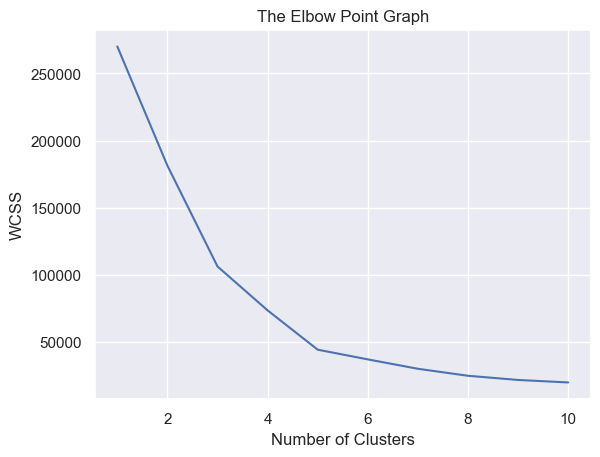

In [47]:
# Plot an elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### According to the plot optimum number of clusters = 5

In [48]:
model = KMeans(n_clusters = 5, init="k-means++", random_state=42)

# return a label for each data point based on their cluster
y = model.fit_predict(x)
print(y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [51]:
x["cluster"] = y
x.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [52]:
c1 = x[x["cluster"] == 0]
c2 = x[x["cluster"] == 1]
c3 = x[x["cluster"] == 2]
c4 = x[x["cluster"] == 3]
c5 = x[x["cluster"] == 4]

## Visualizing

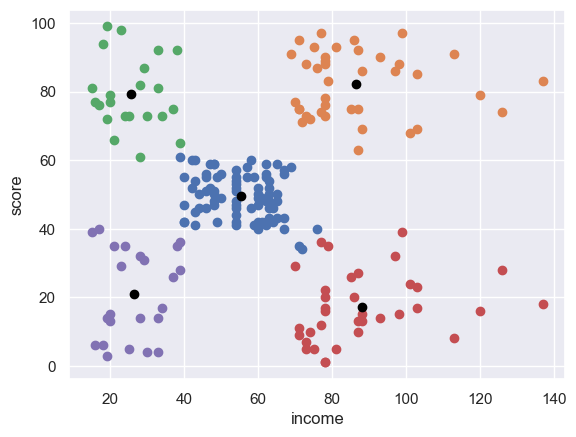

In [54]:
plt.xlabel("income")
plt.ylabel("score")
plt.scatter(c1["Annual Income (k$)"], c1["Spending Score (1-100)"])
plt.scatter(c2["Annual Income (k$)"], c2["Spending Score (1-100)"])
plt.scatter(c3["Annual Income (k$)"], c3["Spending Score (1-100)"])
plt.scatter(c4["Annual Income (k$)"], c4["Spending Score (1-100)"])
plt.scatter(c5["Annual Income (k$)"], c5["Spending Score (1-100)"])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color="black")
plt.show()

In [55]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])